In [2]:
import pandas as pd
import numpy as np

In [4]:
from efficient_apriori import apriori as ef_apriori
from fpgrowth_py import fpgrowth
from apriori_python import apriori

## Сгенерированный набор

In [22]:
data_test = pd.read_csv('./Prac_1_2.csv', sep=';')

In [23]:
data_test

,Транзакция,Товар
0,1,Конфеты
1,1,Чизкейк
2,1,Шоколад
3,1,Эклер
4,1,Пирог
...,...,...
77,19,Печенье
78,20,Эклер
79,20,Пряники
80,20,Круассан


In [24]:
transactions_gen = data_test.groupby('Транзакция')['Товар'].apply(list).to_list()

In [25]:
for i, elem_i in enumerate(transactions_gen):
    for j, elem_j in enumerate(elem_i):
        if type(elem_j) != str:
            transactions_gen[i].pop(j)

transactions_gen

[['Конфеты', 'Чизкейк', 'Шоколад', 'Эклер', 'Пирог', 'Круассан'],
 ['Печенье', 'Пряники', 'Эклер', 'Шоколад', 'Чизкейк'],
 ['Печенье', 'Пряники', 'Шоколад', 'Вафли', 'Эклер'],
 ['Шоколад', 'Эклер', 'Чизкейк', 'Конфеты'],
 ['Вафли', 'Печенье', 'Пряники'],
 ['Пряники', 'Шоколад', 'Эклер', 'Чизкейк'],
 ['Шоколад', 'Эклер', 'Круассан'],
 ['Чизкейк', 'Конфеты', 'Пирог', 'Эклер', 'Шоколад'],
 ['Круассан', 'Шоколад', 'Эклер', 'Чизкейк'],
 ['Пирог', 'Эклер', 'Чизкейк', 'Шоколад'],
 ['Конфеты', 'Пирог'],
 ['Конфеты', 'Пряники', 'Круассан'],
 ['Пряники', 'Чизкейк', 'Шоколад', 'Эклер'],
 ['Шоколад', 'Эклер', 'Конфеты', 'Чизкейк', 'Круассан'],
 ['Шоколад', 'Эклер', 'Конфеты'],
 ['Шоколад', 'Печенье', 'Пряники', 'Эклер'],
 ['Пирог', 'Круассан'],
 ['Шоколад', 'Конфеты', 'Чизкейк', 'Эклер'],
 ['Эклер',
  'Шоколад',
  'Чизкейк',
  'Пирог',
  'Вафли',
  'Пряники',
  'Конфеты',
  'Печенье'],
 ['Эклер', 'Пряники', 'Круассан', 'Чизкейк']]

#### Apriori - gen

In [34]:
%%time
freqItemSet, rules = apriori(transactions_gen, minSup=0.5, minConf=0.6)

CPU times: total: 0 ns
Wall time: 0 ns


In [35]:
for i in rules:
    print(i)

[{'Эклер'}, {'Чизкейк', 'Шоколад'}, 0.6875]
[{'Шоколад'}, {'Чизкейк'}, 0.7333333333333333]
[{'Шоколад'}, {'Эклер', 'Чизкейк'}, 0.7333333333333333]
[{'Эклер', 'Шоколад'}, {'Чизкейк'}, 0.7333333333333333]
[{'Эклер'}, {'Чизкейк'}, 0.75]
[{'Чизкейк'}, {'Шоколад'}, 0.9166666666666666]
[{'Чизкейк'}, {'Эклер', 'Шоколад'}, 0.9166666666666666]
[{'Эклер', 'Чизкейк'}, {'Шоколад'}, 0.9166666666666666]
[{'Эклер'}, {'Шоколад'}, 0.9375]
[{'Чизкейк'}, {'Эклер'}, 1.0]
[{'Шоколад'}, {'Эклер'}, 1.0]
[{'Чизкейк', 'Шоколад'}, {'Эклер'}, 1.0]


#### Efficient apriori - github dataset

In [32]:
%%time
itemsets, rules = ef_apriori(transactions_gen, min_support=0.5, min_confidence=0.6)

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
for i in rules:
    print(i)

{Шоколад} -> {Чизкейк} (conf: 0.733, supp: 0.550, lift: 1.222, conv: 1.500)
{Чизкейк} -> {Шоколад} (conf: 0.917, supp: 0.550, lift: 1.222, conv: 3.000)
{Эклер} -> {Чизкейк} (conf: 0.750, supp: 0.600, lift: 1.250, conv: 1.600)
{Чизкейк} -> {Эклер} (conf: 1.000, supp: 0.600, lift: 1.250, conv: 200000000.000)
{Эклер} -> {Шоколад} (conf: 0.938, supp: 0.750, lift: 1.250, conv: 4.000)
{Шоколад} -> {Эклер} (conf: 1.000, supp: 0.750, lift: 1.250, conv: 200000000.000)
{Шоколад, Эклер} -> {Чизкейк} (conf: 0.733, supp: 0.550, lift: 1.222, conv: 1.500)
{Чизкейк, Эклер} -> {Шоколад} (conf: 0.917, supp: 0.550, lift: 1.222, conv: 3.000)
{Чизкейк, Шоколад} -> {Эклер} (conf: 1.000, supp: 0.550, lift: 1.250, conv: 200000000.000)
{Эклер} -> {Чизкейк, Шоколад} (conf: 0.688, supp: 0.550, lift: 1.250, conv: 1.440)
{Шоколад} -> {Чизкейк, Эклер} (conf: 0.733, supp: 0.550, lift: 1.222, conv: 1.500)
{Чизкейк} -> {Шоколад, Эклер} (conf: 0.917, supp: 0.550, lift: 1.222, conv: 3.000)


#### fpgrowth - gen

In [30]:
%%time
freqItemSet, rules = fpgrowth(transactions_gen, minSupRatio=0.5, minConf=0.6)

CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
for i in rules:
    print(i)

[{'Чизкейк'}, {'Шоколад'}, 0.9166666666666666]
[{'Шоколад'}, {'Чизкейк'}, 0.7333333333333333]
[{'Эклер'}, {'Чизкейк', 'Шоколад'}, 0.6875]
[{'Чизкейк'}, {'Эклер', 'Шоколад'}, 0.9166666666666666]
[{'Шоколад'}, {'Эклер', 'Чизкейк'}, 0.7333333333333333]
[{'Эклер', 'Чизкейк'}, {'Шоколад'}, 0.9166666666666666]
[{'Эклер', 'Шоколад'}, {'Чизкейк'}, 0.7333333333333333]
[{'Чизкейк', 'Шоколад'}, {'Эклер'}, 1.0]
[{'Эклер'}, {'Чизкейк'}, 0.75]
[{'Чизкейк'}, {'Эклер'}, 1.0]
[{'Эклер'}, {'Шоколад'}, 0.9375]
[{'Шоколад'}, {'Эклер'}, 1.0]


## Набор данных из репозитория

In [6]:
data = pd.read_csv('BreadBasket_DMS.csv')
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [7]:
data.isna().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [8]:
data['Item'].value_counts()

Item
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
The BART             1
Adjustment           1
Olum & polenta       1
Bacon                1
Name: count, Length: 95, dtype: int64

In [9]:
data_trans = data[['Transaction', 'Item']]
data_trans = data_trans[data_trans['Item'] != 'NONE']

In [10]:
data_grouped = data_trans.groupby('Transaction')

In [11]:
data_grouped['Item'].count()

Transaction
1       1
2       2
3       3
4       1
5       3
       ..
9680    1
9681    4
9682    4
9683    2
9684    1
Name: Item, Length: 9465, dtype: int64

In [12]:
data_filtered = data_grouped.filter(lambda x: x['Item'].count() >= 2)

In [13]:
transactions_df = data_filtered.groupby(by='Transaction')['Item'].apply(list)

In [14]:
transactions_df

Transaction
2                            [Scandinavian, Scandinavian]
3                           [Hot chocolate, Jam, Cookies]
5                                 [Coffee, Pastry, Bread]
6                             [Medialuna, Pastry, Muffin]
7                        [Medialuna, Pastry, Coffee, Tea]
                              ...                        
9678                        [Coffee, Tacos/Fajita, Toast]
9679                              [Bread, Spanish Brunch]
9681    [Truffles, Tea, Spanish Brunch, Christmas common]
9682                  [Muffin, Tacos/Fajita, Coffee, Tea]
9683                                     [Coffee, Pastry]
Name: Item, Length: 5834, dtype: object

In [15]:
transactions = transactions_df.tolist()

In [37]:
import time

#### Apriori - github dataset

In [38]:
%%time

tic = time.time()

freqItemSet, rules = apriori(transactions, minSup=0.06, minConf=0.06)

toc = time.time()

time_taken_1 = toc - tic 

CPU times: total: 156 ms
Wall time: 155 ms


In [17]:
for i in rules:
    print(i)

[{'Coffee'}, {'Sandwich'}, 0.1028409090909091]
[{'Coffee'}, {'Pastry'}, 0.1278409090909091]
[{'Coffee'}, {'Tea'}, 0.1340909090909091]
[{'Coffee'}, {'Cake'}, 0.1471590909090909]
[{'Coffee'}, {'Bread'}, 0.24204545454545454]
[{'Tea'}, {'Coffee'}, 0.40619621342512907]
[{'Bread'}, {'Coffee'}, 0.43139240506329113]
[{'Cake'}, {'Coffee'}, 0.5833333333333334]
[{'Sandwich'}, {'Coffee'}, 0.5848142164781907]
[{'Pastry'}, {'Coffee'}, 0.5960264900662252]


#### Efficient apriori - github dataset

In [39]:
%%time

tic = time.time()

itemsets, rules = ef_apriori(transactions, min_support=0.06, min_confidence=0.06)

toc = time.time()

time_taken_2 = toc - tic 

CPU times: total: 0 ns
Wall time: 21.9 ms


In [19]:
for i in rules:
    print(i)

{Coffee} -> {Bread} (conf: 0.242, supp: 0.146, lift: 0.715, conv: 0.873)
{Bread} -> {Coffee} (conf: 0.431, supp: 0.146, lift: 0.715, conv: 0.698)
{Coffee} -> {Cake} (conf: 0.147, supp: 0.089, lift: 0.967, conv: 0.994)
{Cake} -> {Coffee} (conf: 0.583, supp: 0.089, lift: 0.967, conv: 0.952)
{Pastry} -> {Coffee} (conf: 0.596, supp: 0.077, lift: 0.988, conv: 0.982)
{Coffee} -> {Pastry} (conf: 0.128, supp: 0.077, lift: 0.988, conv: 0.998)
{Sandwich} -> {Coffee} (conf: 0.585, supp: 0.062, lift: 0.969, conv: 0.955)
{Coffee} -> {Sandwich} (conf: 0.103, supp: 0.062, lift: 0.969, conv: 0.996)
{Tea} -> {Coffee} (conf: 0.406, supp: 0.081, lift: 0.673, conv: 0.668)
{Coffee} -> {Tea} (conf: 0.134, supp: 0.081, lift: 0.673, conv: 0.925)


#### fpgrowth - github dataset

In [40]:
%%time

tic = time.time()

freqItemSet, rules = fpgrowth(transactions, minSupRatio=0.06, minConf=0.06)

toc = time.time()

time_taken_3 = toc - tic 

CPU times: total: 141 ms
Wall time: 396 ms


In [21]:
for i in rules:
    print(i)

[{'Cookies'}, {'Coffee'}, 0.5668789808917197]
[{'Coffee'}, {'Cookies'}, 0.07585227272727273]
[{'Coffee'}, {'Medialuna'}, 0.09460227272727273]
[{'Medialuna'}, {'Coffee'}, 0.6235955056179775]
[{'Sandwich'}, {'Coffee'}, 0.5848142164781907]
[{'Coffee'}, {'Sandwich'}, 0.1028409090909091]
[{'Coffee'}, {'Pastry'}, 0.1278409090909091]
[{'Pastry'}, {'Coffee'}, 0.5960264900662252]
[{'Coffee'}, {'Cake'}, 0.1471590909090909]
[{'Cake'}, {'Coffee'}, 0.5833333333333334]
[{'Tea'}, {'Coffee'}, 0.40619621342512907]
[{'Coffee'}, {'Tea'}, 0.1340909090909091]
[{'Bread'}, {'Coffee'}, 0.43139240506329113]
[{'Coffee'}, {'Bread'}, 0.24204545454545454]


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
performance_dict = {"Apriori":time_taken_1, "Efficient apriori":time_taken_2, "FP growth":time_taken_3}

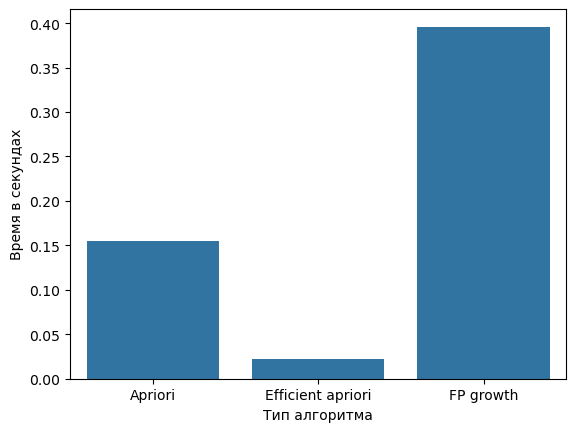

In [61]:
sns.barplot(performance_dict)

plt.xlabel("Тип алгоритма")
plt.ylabel("Время в секундах")
plt.show()